In [ ]:
pip install keras

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

In [ ]:
from keras.utils.data_utils import init_pool_generator
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print ("Training data Shape: ", train_X.shape, train_Y.shape)
print ("Testing data Shape: ", test_X.shape, test_Y.shape)
#print ("Testing data: ", test_X[0], test_Y[0])

Training data Shape:  (60000, 28, 28) (60000,)
Testing data Shape:  (10000, 28, 28) (10000,)


In [ ]:
# Find the unique numbers in the training labels
classes = np.unique(train_Y)
nClasses = len(classes)
print("Total number of Classes: ", nClasses)
print("Output Classes : ", classes)

Total number of Classes:  10
Output Classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground truth : 9')

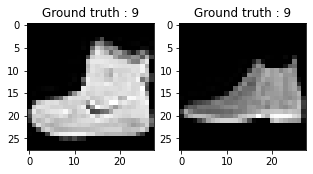

In [ ]:
plt.figure(figsize=(5,5))

# Display the first image in the train data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground truth : {}".format(train_Y[0]))

# Display the first image in the test data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground truth : {}".format(test_Y[0]))

In [ ]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
train_X.shape, test_X.shape
#print ("Testing data: ", test_X[0])

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
# Normalize the dataset
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

test_X.shape, train_X.shape
#print ("Testing data: ", test_X[0])

((10000, 28, 28, 1), (60000, 28, 28, 1))

In [ ]:
# Change the labels from categrorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for categorical labels using one-hot encoding
print("Original label : ", train_Y[0])
print("After conversion to one-hot encoding label : ", train_Y_one_hot[0])

Original label :  9
After conversion to one-hot encoding label :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
from sklearn.model_selection import train_test_split
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=5)

In [ ]:
train_X.shape, valid_X.shape, test_X.shape 

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
import keras
import tensorflow
from keras.models import Sequential, Model, Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
batch_size = 64
epochs = 20
num_classes = 10

In [36]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(28, 28, 1), padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
fashion_model.add(Conv2D(64, kernel_size=(3,3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
fashion_model.add(Conv2D(128, kernel_size=(3,3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [ ]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, validation_data=(valid_X, valid_label), verbose=1)

Epoch 1/20
750/750 [==============================] - 94s 125ms/step - loss: 0.4659 - accuracy: 0.8286 - val_loss: 0.3251 - val_accuracy: 0.8817
Epoch 2/20
750/750 [==============================] - 93s 124ms/step - loss: 0.2893 - accuracy: 0.8951 - val_loss: 0.2773 - val_accuracy: 0.8992
Epoch 3/20
750/750 [==============================] - 95s 126ms/step - loss: 0.2378 - accuracy: 0.9133 - val_loss: 0.2564 - val_accuracy: 0.9085
Epoch 4/20
750/750 [==============================] - 94s 126ms/step - loss: 0.2081 - accuracy: 0.9241 - val_loss: 0.2499 - val_accuracy: 0.9068
Epoch 5/20
750/750 [==============================] - 94s 126ms/step - loss: 0.1826 - accuracy: 0.9321 - val_loss: 0.2482 - val_accuracy: 0.9082
Epoch 6/20
750/750 [==============================] - 95s 127ms/step - loss: 0.1597 - accuracy: 0.9405 - val_loss: 0.2267 - val_accuracy: 0.9155
Epoch 7/20
750/750 [==============================] - 94s 125ms/step - loss: 0.1389 - accuracy: 0.9485 - val_loss: 0.2319 - val_ac

In [30]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 6s 20ms/step - loss: 0.4938 - accuracy: 0.9150


In [31]:
print("test loss: ", test_eval[0])
print("test accuracy: ", test_eval[1])

test loss:  0.49379637837409973
test accuracy:  0.9150000214576721


In [32]:
k = list(fashion_train.history.keys())
a = list(fashion_train.history.values())
val_loss = a[0]
val_accuracy = a[1]
loss = a[2]
accuracy = a[3]
epochs = range(len(accuracy))

In [33]:
epochs

range(0, 20)

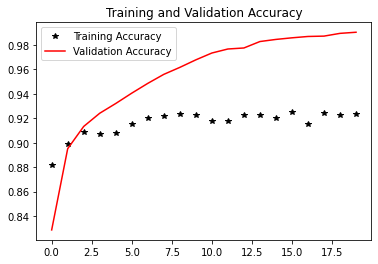

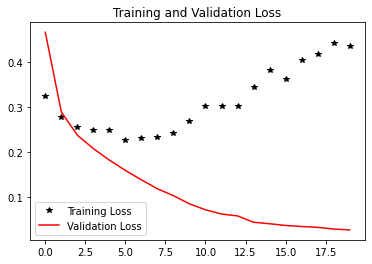

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(epochs, accuracy, 'k*', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'k*', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.figure()
plt.show()

In [37]:
#Introduce drop out into the neural network for overfitting issue, 
# retrain model with dropout to keep some neurons inactive over training not to memorise training data

batch_size = 64
epochs = 20
num_classes = 10
fashion_model2 = Sequential()
fashion_model2.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(28, 28, 1), padding='same'))
fashion_model2.add(LeakyReLU(alpha=0.1))
fashion_model2.add(MaxPooling2D(pool_size=(2,2), padding='same'))
fashion_model2.add(Dropout(0.25))
fashion_model2.add(Conv2D(64, kernel_size=(3,3), activation='linear', padding='same'))
fashion_model2.add(LeakyReLU(alpha=0.1))
fashion_model2.add(MaxPooling2D(pool_size=(2,2), padding='same'))
fashion_model2.add(Dropout(0.25))
fashion_model2.add(Conv2D(128, kernel_size=(3,3), activation='linear', padding='same'))
fashion_model2.add(LeakyReLU(alpha=0.1))
fashion_model2.add(MaxPooling2D(pool_size=(2,2), padding='same'))
fashion_model2.add(Dropout(0.4))
fashion_model2.add(Flatten())
fashion_model2.add(Dense(128, activation='linear'))
fashion_model2.add(LeakyReLU(alpha=0.1))
fashion_model2.add(Dropout(0.3))
fashion_model2.add(Dense(num_classes, activation='softmax'))

In [38]:
fashion_model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                      

In [39]:
fashion_model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(), metrics=['accuracy'])

# Train neural network with dropout
fashion_train2 = fashion_model2.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, validation_data=(valid_X, valid_label), verbose=1)

# Save neural network
fashion_model2.save("fashion_model_dropout.h5py")

Epoch 1/20
750/750 [==============================] - 104s 138ms/step - loss: 0.5945 - accuracy: 0.7794 - val_loss: 0.3779 - val_accuracy: 0.8618
Epoch 2/20
750/750 [==============================] - 101s 135ms/step - loss: 0.3770 - accuracy: 0.8622 - val_loss: 0.3060 - val_accuracy: 0.8873
Epoch 3/20
750/750 [==============================] - 100s 134ms/step - loss: 0.3283 - accuracy: 0.8782 - val_loss: 0.2734 - val_accuracy: 0.8992
Epoch 4/20
750/750 [==============================] - 102s 136ms/step - loss: 0.3032 - accuracy: 0.8877 - val_loss: 0.2595 - val_accuracy: 0.9042
Epoch 5/20
750/750 [==============================] - 99s 132ms/step - loss: 0.2818 - accuracy: 0.8951 - val_loss: 0.2446 - val_accuracy: 0.9097
Epoch 6/20
750/750 [==============================] - 99s 132ms/step - loss: 0.2667 - accuracy: 0.9008 - val_loss: 0.2333 - val_accuracy: 0.9140
Epoch 7/20
750/750 [==============================] - 99s 132ms/step - loss: 0.2542 - accuracy: 0.9043 - val_loss: 0.2295 - va

In [40]:
test_eval2 = fashion_model2.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 6s 20ms/step - loss: 0.2234 - accuracy: 0.9200


In [41]:
print("test loss: ", test_eval2[0])
print("test accuracy: ", test_eval2[1])

test loss:  0.22343195974826813
test accuracy:  0.9200000166893005


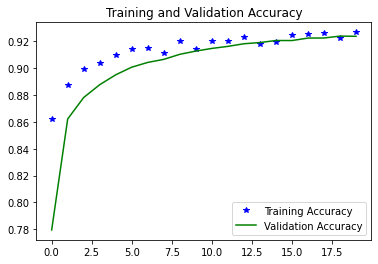

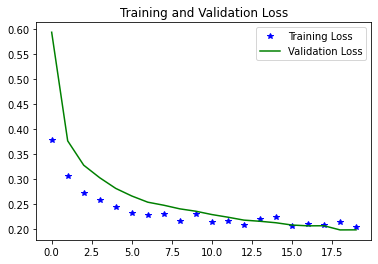

<Figure size 432x288 with 0 Axes>

In [43]:
k2 = list(fashion_train2.history.keys())
a2 = list(fashion_train2.history.values())
val_loss = a2[0]
val_accuracy = a2[1]
loss = a2[2]
accuracy = a2[3]
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b*', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b*', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.figure()
plt.show()

In [55]:
# Predict the test data
predicted_classes = fashion_model2.predict(test_X)

In [56]:
# Convert the floating point predicted classes into the closest integer, 
# and find where the binary predicted class is 1 to find the class number
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)
predicted_classes, predicted_classes.shape, test_Y.shape

(array([9, 2, 1, ..., 8, 1, 5]), (10000,), (10000,))

In [57]:
test_accuracy = sum(predicted_classes == test_Y)/len(test_Y)
test_accuracy

0.9173

Found 9173 correct labels


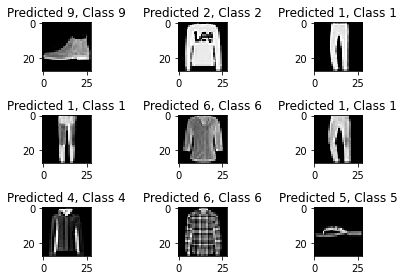

In [58]:
correct = np.where(predicted_classes == test_Y)[0]
print("Found %d correct labels" % len(correct))

for i, correct in enumerate(correct[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(test_X[correct].reshape(28, 28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
  plt.tight_layout()

Found 827 incorrect labels


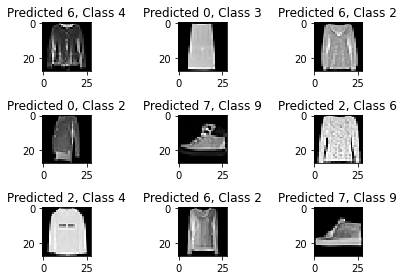

In [59]:
incorrect = np.where(predicted_classes != test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))

for i, incorrect in enumerate(incorrect[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(test_X[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
  plt.tight_layout()

In [60]:
#Introduce drop out into the neural network architecture for overfitting issue, 
# retrain model with dropout to keep some neurons inactive over training not to memorise training data
# Apply rectified linear unit activation to the convolutional layers

batch_size = 64
epochs = 20
num_classes = 10
fashion_model3 = Sequential()
fashion_model3.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1), padding='same'))
fashion_model3.add(LeakyReLU(alpha=0.1))
fashion_model3.add(MaxPooling2D(pool_size=(2,2), padding='same'))
fashion_model3.add(Dropout(0.25))
fashion_model3.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
fashion_model3.add(LeakyReLU(alpha=0.1))
fashion_model3.add(MaxPooling2D(pool_size=(2,2), padding='same'))
fashion_model3.add(Dropout(0.25))
fashion_model3.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
fashion_model3.add(LeakyReLU(alpha=0.1))
fashion_model3.add(MaxPooling2D(pool_size=(2,2), padding='same'))
fashion_model3.add(Dropout(0.4))
fashion_model3.add(Flatten())
fashion_model3.add(Dense(128, activation='relu'))
fashion_model3.add(LeakyReLU(alpha=0.1))
fashion_model3.add(Dropout(0.3))
fashion_model3.add(Dense(num_classes, activation='softmax'))

In [61]:
fashion_model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                      

In [62]:
fashion_model3.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(), metrics=['accuracy'])

# Train neural network with dropout
fashion_train3 = fashion_model3.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, validation_data=(valid_X, valid_label), verbose=1)

# Save neural network
fashion_model3.save("fashion_model_dropout2.h5py")

Epoch 1/20
750/750 [==============================] - 113s 150ms/step - loss: 0.6404 - accuracy: 0.7638 - val_loss: 0.3827 - val_accuracy: 0.8593
Epoch 2/20
750/750 [==============================] - 112s 149ms/step - loss: 0.3999 - accuracy: 0.8539 - val_loss: 0.3188 - val_accuracy: 0.8841
Epoch 3/20
750/750 [==============================] - 110s 147ms/step - loss: 0.3470 - accuracy: 0.8722 - val_loss: 0.2863 - val_accuracy: 0.8938
Epoch 4/20
750/750 [==============================] - 110s 146ms/step - loss: 0.3161 - accuracy: 0.8838 - val_loss: 0.2740 - val_accuracy: 0.8967
Epoch 5/20
750/750 [==============================] - 110s 146ms/step - loss: 0.3010 - accuracy: 0.8896 - val_loss: 0.2732 - val_accuracy: 0.8967
Epoch 6/20
750/750 [==============================] - 110s 146ms/step - loss: 0.2818 - accuracy: 0.8962 - val_loss: 0.2447 - val_accuracy: 0.9082
Epoch 7/20
750/750 [==============================] - 109s 146ms/step - loss: 0.2700 - accuracy: 0.9009 - val_loss: 0.2398 -

In [63]:
test_eval3 = fashion_model3.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 7s 22ms/step - loss: 0.2241 - accuracy: 0.9194


In [64]:
print("test loss: ", test_eval3[0])
print("test accuracy: ", test_eval3[1])

test loss:  0.2241431325674057
test accuracy:  0.9193999767303467


In [65]:
fashion_model4 = Sequential()
fashion_model4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = (28, 28, 1)))
fashion_model4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
fashion_model4.add(MaxPooling2D(pool_size=(2, 2)))
fashion_model4.add(Dropout(0.25))
fashion_model4.add(Flatten())
fashion_model4.add(Dense(128, activation='relu'))
fashion_model4.add(Dropout(0.5))
fashion_model4.add(Dense(10, activation='softmax'))

fashion_model4.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(), metrics=['accuracy'])

fashion_model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_5 (Flatten)         (None, 9216)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               1179776   
                                                      

In [66]:
# Train neural network with dropout
batch_size = 64
epochs = 20
num_classes = 10
fashion_train4 = fashion_model4.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, validation_data=(valid_X, valid_label), verbose=1)

# Save neural network
fashion_model4.save("fashion_model_net.h5py")

Epoch 1/20
750/750 [==============================] - 140s 186ms/step - loss: 0.5228 - accuracy: 0.8138 - val_loss: 0.3311 - val_accuracy: 0.8788
Epoch 2/20
750/750 [==============================] - 139s 185ms/step - loss: 0.3449 - accuracy: 0.8765 - val_loss: 0.2817 - val_accuracy: 0.8957
Epoch 3/20
750/750 [==============================] - 139s 186ms/step - loss: 0.2959 - accuracy: 0.8917 - val_loss: 0.2576 - val_accuracy: 0.9031
Epoch 4/20
750/750 [==============================] - 139s 185ms/step - loss: 0.2618 - accuracy: 0.9054 - val_loss: 0.2539 - val_accuracy: 0.9050
Epoch 5/20
750/750 [==============================] - 139s 186ms/step - loss: 0.2362 - accuracy: 0.9135 - val_loss: 0.2302 - val_accuracy: 0.9167
Epoch 6/20
750/750 [==============================] - 139s 185ms/step - loss: 0.2186 - accuracy: 0.9206 - val_loss: 0.2199 - val_accuracy: 0.9215
Epoch 7/20
750/750 [==============================] - 138s 185ms/step - loss: 0.2005 - accuracy: 0.9266 - val_loss: 0.2122 -

In [67]:
test_eval4 = fashion_model4.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 8s 24ms/step - loss: 0.2704 - accuracy: 0.9271


In [68]:
print("test loss: ", test_eval4[0])
print("test accuracy: ", test_eval4[1])

test loss:  0.2704107165336609
test accuracy:  0.9271000027656555


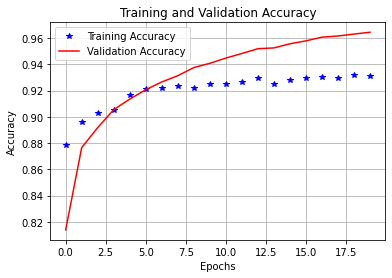

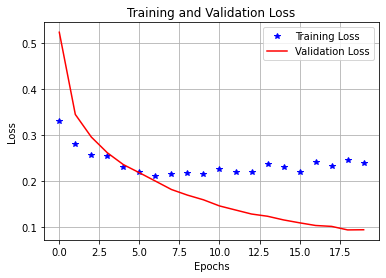

<Figure size 432x288 with 0 Axes>

In [71]:
k4 = list(fashion_train4.history.keys())
a4 = list(fashion_train4.history.values())
val_loss = a4[0]
val_accuracy = a4[1]
loss = a4[2]
accuracy = a4[3]
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b*', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.title("Training and Validation Accuracy")
plt.grid()
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b*', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.grid()
plt.legend()
plt.figure()
plt.show()